In [6]:
#ReadMe
#acquiring data and labeling data and organizing data
#analyze fundamental characteristics of publicly-traded companies 
#market cap, trailing PE, PB, dividend and etc
#http://theautomatic.net/yahoo_fin-documentation/

In [2]:
import time
from datetime import datetime
from time import mktime
from sklearn import svm #svm stats explaination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [3]:
#standard python libraties
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [4]:
import time
from datetime import datetime
from time import mktime
from sklearn import svm #svm stats explaination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns',None)

In [5]:
# Data Manipulation 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns',None)

# Data Prep - Download and Manipulation

In [ ]:
pip install yahoo_fin
pip install --upgrade yahoo_fin
pip install requests_html

In [1]:
from yahoo_fin.stock_info import *


In [38]:
#get_day_gainers()
#get_day_losers()
#get_day_most_active()
#get_dividends("msft", "01-01-2010")
#get_earnings_for_date('07/06/2021')
#get_financials('nflx', yearly = True, quarterly = False)

#get balance sheet
#balance_sheet = get_balance_sheet('amzn')

#get cash flow statement
#cash_flow = get_cash_flow('amzn')

#income statement
#income_statement = get_income_statement("amzn")

#Efficient method to scrape balance sheets, cash flow statements, and income statements in a single call from Yahoo Finance’s financials page for a given ticker 
# get only yearly data
#get_financials('nflx', yearly = True, quarterly = False)
#Scrapes the top 100 most active stocks (on the given trading day) from Yahoo Finance
#get_day_most_active()
# dividends from 2010 onward
#get_dividends("msft", "01-01-2010")
#Scrapes earnings information from Yahoo Finance’s financials page for a given ticke
#get_earnings('nflx')


In [51]:
#Get Ticker List
dow_table = tickers_dow(True)
nasdaq_table = tickers_nasdaq(True)
sp500_table = tickers_sp500(True)

In [55]:
#key stats, we can get label of outperform and underperform compared to SP500
#stats = get_stats('amzn')
#stats_val = get_stats_valuation('amzn')
#price = get_data('amzn')

In [52]:
tickers = sp500_table['Symbol']

In [19]:
#create a combined stocks list by combining nasdaq stocks + sp500
#in_tickers = set(tickers) #in sp500
#in_nasdaq = set(nasdaq_list) #in nasdaq

#in_sp_but_not_in_nasdaq = in_tickers - in_nasdaq 

In [20]:
#ticker_list_combined = sorted(nasdaq_list + list(in_sp_but_not_in_nasdaq))

In [53]:
#combine get stats returned stats for the tickers list to one dataset function
def combine_df(tickers):
    dfObj = pd.DataFrame()
    for i in tickers:
        try:
            stats = get_stats(i)
            stats.set_index('Attribute',inplace=True)
            stats_T = stats.transpose()
            stats_T.insert(0, "Ticker", i, True) 
            dfObj = dfObj.append(stats_T)
            print(i)
        except:
            pass
    return dfObj    

In [54]:
#run the create combined dataset function
df = combine_df(tickers)

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK-B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF-B
CHRW
COG
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EFX
EQIX
EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM
HBAN
HII
IE

In [68]:
#df.to_csv ('.sp500.csv', index = False, header=True)
#df = pd.read_csv('.sp500.csv')
#df = pd.read_pickle("./SP500.pkl")
#in case need to delete the data
#import os
#os.remove("./dummy.pkl")

In [ ]:
formatlist = [i for i in range(len(df.columns)) if i not in exceptionlist]

In [ ]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if 'T' in x:
        return float(x.replace('T', '')) * 1000000000000
    if '$' in x:
        return float(x.replace('$',''))
    if '%' in x:
        try: 
            return float(x.replace('%','').replace(',',''))/100
        except :
            return 0
    if ',' in x:
        return float(x.replace(',',''))
    
    return float(x) 
    

In [ ]:
#format all other columns
for i in formatlist:
        df.iloc[:, i] = df.iloc[:, i].apply(value_to_float)

In [61]:
dattimelist = ["Dividend Date 3","Ex-Dividend Date 4","Last Split Date 3","Fiscal Year Ends","Most Recent Quarter (mrq)"]
#format datetime from object to datetime
for i in dattimelist:
    df[i] = pd.to_datetime(df[i])

In [75]:
#df['Import_Date'] = pd.to_datetime('today').strftime('%m/%d/%Y')

In [70]:
#impute SP500 change to all same value
df['S&P500 52-Week Change 3'].fillna(df['S&P500 52-Week Change 3'].mean(), inplace=True)

In [72]:
#Dropping columns with missing value rate higher than threshold
threshold = 0.7
df2 = df[df.columns[df.isnull().mean() < threshold]]

In [118]:
#generate one column that defines over perform or underperform sp500
df2.loc[df2['52-Week Change 3'] > df['S&P500 52-Week Change 3'], 'Perform_Ind'] = 1
df2.loc[df2['52-Week Change 3'] <= df['S&P500 52-Week Change 3'], 'Perform_Ind'] = 0

In [119]:
b = sp500_table[["Symbol","GICS Sector","GICS Sub-Industry"]]

In [120]:
df3 = pd.merge(df2, b, how='left', left_on='Ticker', right_on='Symbol').drop('Symbol',1)

In [121]:
#save the dataset to pickle
df3.to_pickle("./SP500.pkl")
#df.to_pickle("./Nasdaq.pkl")

In [122]:
sp500 = pd.read_pickle("./SP500.pkl")

In [123]:
sp500.head(2)

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Import_Date,Perform_Ind,GICS Sector,GICS Sub-Industry
0,MMM,0.96,0.30,0.38,208.95,148.80,199.81,188.79,2180000.00,2090000.00,579680000.00,579030000.00,0.00,0.68,10960000.00,6.25,0.02,0.02,10070000.00,5.92,0.03,5.89,0.03,2.87,0.60,2021-06-11,2021-05-19,2:1,2003-09-29,2020-12-30,2021-03-30,0.17,0.23,0.10,0.47,32960000000.00,56.97,0.10,15690000000.00,9390000000.00,5700000000.00,9.77,0.24,5140000000.00,8.87,19060000000.00,137.86,1.84,23.74,8590000000.00,6550000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Industrials,Industrial Conglomerates
1,ABT,0.68,0.27,0.38,128.54,91.71,112.96,116.98,6410000.00,6350000.00,1780000000.00,1760000000.00,0.01,0.76,14010000.00,1.77,0.01,0.01,14200000.00,1.80,0.01,1.62,0.01,1.74,0.48,2021-08-15,2021-07-13,10000:4798,2013-01-01,2020-12-30,2021-03-30,0.15,0.19,0.06,0.18,37340000000.00,21.04,0.35,19610000000.00,10360000000.00,5690000000.00,3.19,2.18,8370000000.00,4.71,18440000000.00,54.59,1.75,18.89,9820000000.00,6360000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Health Care,Health Care Equipment


# Exploratory Data Analysis

Univariate

In [7]:
# Describing all the Numerical Features
sp500 = pd.read_pickle("./SP500.pkl")
sp500.describe()


,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Perform_Ind
count,192.00,193.00,505.00,193.00,193.00,193.00,193.00,505.00,505.00,504.00,504.00,504.00,504.00,278.00,278.00,276.00,278.00,278.00,385.00,385.00,400.00,400.00,351.00,468.00,505.00,505.00,505.00,484.00,505.00,504.00,503.00,505.00,475.00,505.00,491.00,398.00,504.00,504.00,503.00,458.00,482.00,491.00,502.00,475.00,196.00,196.00,194.00,196.00,196.00,193.00
mean,1.07,0.46,0.38,240.71,149.77,219.58,207.51,4260284.20,3704979.21,623040793.65,599990158.73,0.03,0.83,11423517.70,3.20,0.03,0.02,11282286.94,2.30,0.02,2.08,0.02,2.36,0.50,0.11,-0.07,0.06,0.44,25007810495.05,377.80,0.18,9072360297.03,4990612547.37,2414008237.62,140.59,2.53,16525449861.11,212.75,20719862067.59,205.58,2.12,633.81,4141133486.06,2593078678.95,9075243.83,3.08,0.03,0.02,8846826.84,0.53
std,0.61,0.39,0.00,439.00,292.98,402.84,379.79,7956572.01,6975515.94,1211150867.55,1194785470.54,0.08,0.13,17230815.96,2.26,0.03,0.02,17646383.82,1.90,0.01,1.85,0.01,1.35,1.06,0.23,3.45,0.06,2.62,50166486268.32,7049.48,0.38,17423452755.94,11793110987.83,8089669102.39,2984.67,15.00,100970496895.02,4256.02,60131615596.55,584.17,4.39,13246.24,9805927914.32,8264871517.58,10290828.09,1.75,0.02,0.02,9674726.84,0.50
min,0.10,-0.24,0.38,12.76,7.45,11.79,11.65,20830.00,22970.00,3640000.00,1260000.00,0.00,0.30,474990.00,0.62,0.00,0.00,331770.00,0.01,0.00,0.00,0.00,0.02,0.00,-2.35,-61.77,-0.17,-5.61,36130000.00,0.13,-1.00,-5540000000.00,-10760000000.00,-19100000000.00,-25.42,-0.88,1180000.00,0.00,5410000.00,0.39,0.07,-83.36,-33380000000.00,-25200000000.00,41650.00,0.75,0.01,0.00,39780.00,0.00
25%,0.68,0.17,0.38,70.77,42.38,65.43,62.50,952650.00,817550.00,149797500.00,143107500.00,0.00,0.76,2632500.00,2.01,0.01,0.01,2650000.00,1.00,0.01,0.84,0.01,1.33,0.00,0.06,0.10,0.02,0.07,4550000000.00,17.77,0.03,1910000000.00,1060000000.00,415500000.00,1.62,0.03,691012500.00,2.69,3235000000.00,47.71,1.02,12.05,940922500.00,474695000.00,2497500.00,1.95,0.01,0.01,2607500.00,0.00
50%,1.02,0.39,0.38,127.68,77.63,117.87,110.53,1940000.00,1720000.00,298570000.00,284730000.00,0.01,0.86,5630000.00,2.48,0.02,0.01,5635000.00,1.92,0.02,1.68,0.02,2.19,0.31,0.12,0.18,0.05,0.15,9870000000.00,30.48,0.11,3750000000.00,2100000000.00,876300000.00,3.69,0.39,1800000000.00,5.83,7370000000.00,90.84,1.48,24.42,1780000000.00,1010000000.00,5170000.00,2.50,0.02,0.02,5195000.00,1.00
75%,1.33,0.66,0.38,230.00,146.15,211.90,200.95,4060000.00,3450000.00,601172500.00,583580000.00,0.02,0.93,11580000.00,3.34,0.03,0.02,11980000.00,3.00,0.03,2.76,0.03,3.02,0.57,0.20,0.27,0.09,0.28,20700000000.00,60.65,0.26,7400000000.00,4430000000.00,2230000000.00,6.78,1.14,5440000000.00,13.11,16630000000.00,160.74,2.15,45.18,3682500000.00,2470000000.00,12205000.00,3.72,0.03,0.03,11667500.00,1.00
max,4.93,2.38,0.38

In [8]:
# Describing all the Categorical Features
sp500.describe(include=['O'])


,Ticker,Last Split Factor 2,Import_Date,GICS Sector,GICS Sub-Industry
count,505,401,505,505,505
unique,505,99,1,11,125
top,HAL,2:1,07/07/2021,Industrials,Health Care Equipment
freq,1,215,505,74,19


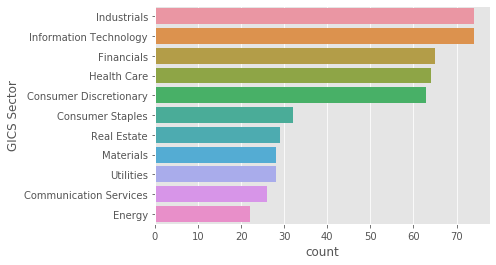

In [9]:
#categorical variable
sns.countplot(y="GICS Sector" , data=sp500,   order = sp500["GICS Sector"].value_counts().index)


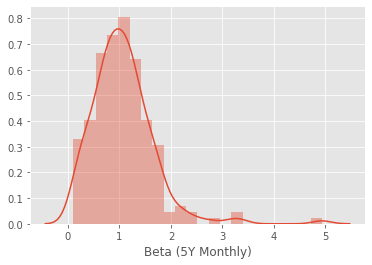

In [10]:
#continuous variable
sns.distplot(sp500['Beta (5Y Monthly)'])

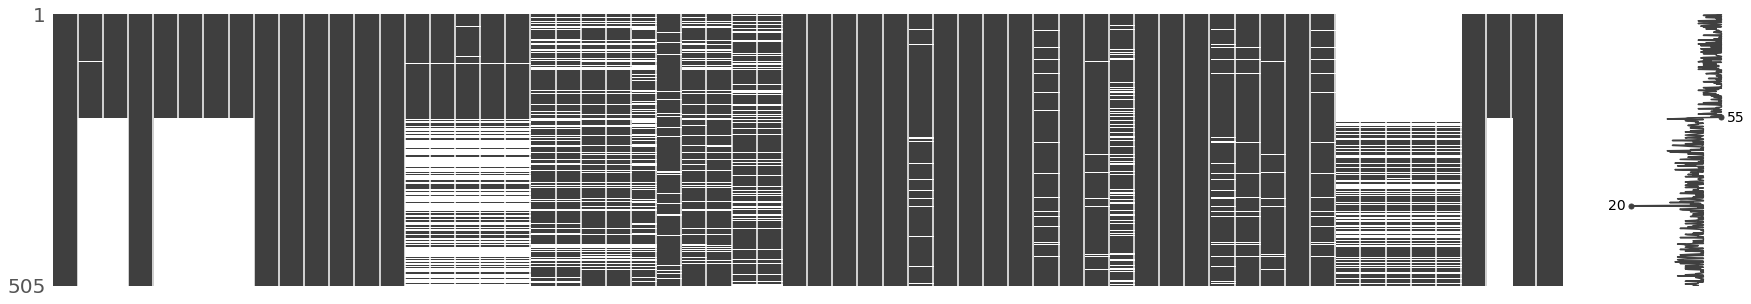

In [11]:
# How many missing values are there in our dataset?
missingno.matrix(sp500, figsize = (30,5))

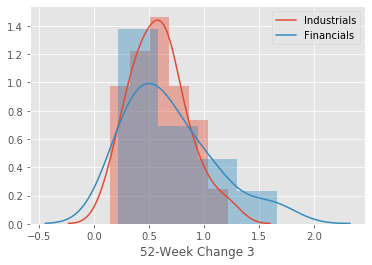

In [12]:
sns.distplot(sp500.loc[sp500["GICS Sector"] == "Industrials"]['52-Week Change 3'], kde_kws={"label": "Industrials"});

sns.distplot(sp500.loc[sp500["GICS Sector"] == 'Financials']['52-Week Change 3'], kde_kws={"label": "Financials"});

In [8]:
#top 10 moving average company
sp500.nlargest(10,'200-Day Moving Average 3')

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Import_Date,Perform_Ind,GICS Sector,GICS Sub-Industry
25,AMZN,1.15,0.15,0.38,3734.20,2871.00,3351.96,3254.33,3530000.00,3110000.00,504320000.00,452170000.00,0.14,0.59,4830000.00,1.77,0.01,0.01,4810000.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,2:1,1999-09-01,2020-12-30,2021-03-30,0.06,0.07,0.07,0.32,419130000000.00,835.75,0.44,152760000000.00,57170000000.00,26900000000.00,52.56,2.20,73270000000.00,145.28,101520000000.00,98.26,1.05,205.00,67210000000.00,31390000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Consumer Discretionary,Internet & Direct Marketing Retail
71,BKNG,1.27,0.33,0.38,2516.00,1589.00,2283.91,2268.63,344440.00,389220.00,41050000.00,40930000.00,0.00,0.94,752410.00,2.55,0.02,0.02,686110.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,1:6,2003-06-15,2020-12-30,2021-03-30,0.12,0.02,0.00,0.16,5650000000.00,137.97,-0.50,4850000000.00,551000000.00,703000000.00,17.10,nan,12650000000.00,308.16,14170000000.00,297.36,2.18,116.05,258000000.00,865880000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Consumer Discretionary,Internet & Direct Marketing Retail
23,GOOG,1.02,0.72,0.38,2612.80,1406.55,2478.82,2169.34,1290000.00,1110000.00,323580000.00,583490000.00,0.06,0.68,3140000.00,2.76,nan,0.00,2480000.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,10000000:10000000,2015-04-26,2020-12-30,2021-03-30,0.26,0.25,0.10,0.24,196680000000.00,290.30,0.34,97800000000.00,63000000000.00,51360000000.00,75.04,1.62,135100000000.00,201.60,28250000000.00,12.28,3.10,342.74,72960000000.00,42340000000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Communication Services,Interactive Media & Services
22,GOOGL,1.02,0.66,0.38,2545.68,1402.15,2407.11,2140.62,1430000.00,1220000.00,300750000.00,583490000.00,0.00,0.81,2700000.00,2.19,0.01,0.00,2970000.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,1998:1000,2014-04-02,2020-12-30,2021-03-30,0.26,0.25,0.10,0.24,196680000000.00,290.30,0.34,97800000000.00,63000000000.00,51360000000.00,75.04,1.62,135100000000.00,201.60,28250000000.00,12.28,3.10,342.74,72960000000.00,42340000000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Communication Services,Interactive Media & Services
103,CMG,1.35,0.40,0.38,1597.98,1067.59,1405.27,1437.01,287370.00,283430.00,28150000.00,27720000.00,0.01,0.92,821090.00,2.86,0.03,0.03,733760.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,NaN,NaT,2020-12-30,2021-03-30,0.06,0.07,0.05,0.22,6320000000.00,225.55,0.23,2070000000.00,657080000.00,406480000.00,14.27,0.66,1060000000.00,37.60,3250000000.00,154.91,1.75,74.49,787750000.00,362550000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Consumer Discretionary,Restaurants
56,AZO,0.95,0.39,0.38,1554.90,1085.85,1433.50,1340.56,193040.00,167980.00,21540000.00,21460000.00,0.00,0.93

In [11]:
#Forward Annual Dividend Yield 4
sp500.nlargest(10,'Forward Annual Dividend Yield 4')[['Ticker','Forward Annual Dividend Yield 4']]

,Ticker,Forward Annual Dividend Yield 4
24,MO,0.07
52,T,0.07
294,LUMN,0.07
354,OKE,0.07
494,WMB,0.06
378,PPL,0.06
273,KMI,0.06
258,IRM,0.06
184,XOM,0.06
102,CVX,0.05


In [12]:
#top 5 increase ratio
sp500.nlargest(5,'52-Week Change 3')


,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Import_Date,Perform_Ind,GICS Sector,GICS Sub-Industry
168,ENPH,1.15,2.38,0.38,229.04,51.33,154.83,164.10,3110000.00,2320000.00,135700000.00,254260000.00,0.06,0.70,4710000.00,1.75,0.04,0.03,4670000.00,nan,nan,nan,nan,nan,0.00,NaT,NaT,NaN,NaT,2020-12-30,2021-03-30,0.11,0.24,0.08,0.18,870630000.00,6.83,0.47,345980000.00,223590000.00,96760000.00,0.67,-0.54,1490000000.00,5.49,1020000000.00,139.31,5.20,5.40,252950000.00,181650000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Information Technology,Electronic Components
141,DVN,3.35,1.84,0.38,31.99,7.73,28.54,22.92,10870000.00,11270000.00,676900000.00,631750000.00,0.01,0.85,15810000.00,1.36,0.02,0.02,16500000.00,0.44,0.02,0.44,0.02,1.55,nan,2021-06-29,2021-06-10,2:1,2004-11-15,2020-12-30,2021-03-30,-0.12,-0.09,-0.02,-0.10,5370000000.00,12.06,0.66,1560000000.00,930000000.00,-652000000.00,-1.49,nan,1680000000.00,2.49,7560000000.00,89.08,1.18,12.38,1550000000.00,1690000000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Energy,Oil & Gas Exploration & Production
84,COF,1.78,1.67,0.38,168.00,57.30,159.14,132.86,3110000.00,2770000.00,451490000.00,447090000.00,0.01,0.93,5120000.00,1.65,0.01,0.01,5520000.00,1.60,0.01,1.00,0.01,1.76,0.07,2021-05-27,2021-05-13,3:1,1999-06-01,2020-12-30,2021-03-30,0.30,0.40,0.02,0.13,24370000000.00,53.20,3.35,18260000000.00,nan,7040000000.00,15.30,nan,52520000000.00,116.33,39420000000.00,nan,nan,123.34,12930000000.00,nan,nan,nan,nan,nan,nan,07/07/2021,1.00,Financials,Consumer Finance
159,DXC,2.46,1.59,0.38,41.75,14.73,38.96,31.34,2410000.00,2470000.00,254810000.00,252720000.00,0.01,0.88,7860000.00,3.17,0.04,0.03,7240000.00,nan,nan,0.00,0.00,nan,0.00,2020-04-13,2020-03-23,1156:1000,2018-05-31,2021-03-30,2021-03-30,-0.01,0.00,0.00,-0.03,17730000000.00,69.76,-0.09,3830000000.00,1780000000.00,-149000000.00,-0.59,nan,2970000000.00,11.65,6970000000.00,131.27,1.01,19.53,124000000.00,1830000000.00,nan,nan,nan,nan,nan,07/07/2021,1.00,Information Technology,IT Consulting & Other Services
145,DFS,1.83,1.54,0.38,125.38,45.40,119.26,103.26,1960000.00,1560000.00,304890000.00,303330000.00,0.01,0.88,4620000.00,2.62,0.02,0.02,5130000.00,1.76,0.01,1.76,0.01,2.16,0.20,2021-06-02,2021-05-18,NaN,NaT,2020-12-30,2021-03-30,0.35,0.47,0.02,0.26,8030000000.00,26.19,1.92,5410000000.00,nan,2730000000.00,8.89,nan,20350000000.00,66.74,21010000000.00,172.88,1.19,36.27,6020000000.00,nan,nan,nan,nan,nan,nan,07/07/2021,1.00,Financials,Consumer Finance


In [17]:
sp500.corr()[['Perform_Ind']].sort_values(by='Perform_Ind',ascending=False)
#Quarterly revenue growth is one of the top indicator

,Perform_Ind
Perform_Ind,1.00
52-Week Change 3,0.73
Beta (5Y Monthly),0.53
Quarterly Revenue Growth (yoy),0.22
Current Ratio (mrq),0.18
Quarterly Earnings Growth (yoy),0.12
Avg Vol (10 day) 3,0.12
Total Cash (mrq),0.12
Net Income Avi to Common (ttm),0.11
Avg Vol (3 month) 3,0.11


In [34]:
#avg and median by industry

sp500.groupby(sp500["GICS Sector"]).agg({'52-Week Change 3':['min', 'max', 'mean',"std"],'Current Ratio (mrq)':'mean'})

52-Week Change 3                Current Ratio (mrq)
                                    min  max mean  std                mean
GICS Sector                                                               
Communication Services            -0.02 0.72 0.40 0.25                1.92
Consumer Discretionary             0.09 1.40 0.54 0.38                2.19
Consumer Staples                  -0.21 0.70 0.19 0.25                1.40
Energy                            -0.00 1.84 0.74 0.57                1.38
Financials                         0.22 1.67 0.68 0.40                2.30
Health Care                       -0.05 1.21 0.36 0.30                2.18
Industrials                        0.15 1.22 0.59 0.26                1.80
Information Technology            -0.24 2.38 0.50 0.54                2.16
Materials                          0.06 1.23 0.55 0.38                1.90
Real Estate                        0.04 0.94 0.36 0.27                5.21
Utilities                         -0.06 0.87 0.14 0.21                0.83

In [20]:
#50 day moving avg < 200 moving avg
sp500.loc[(sp500['50-Day Moving Average 3']>sp500['200-Day Moving Average 3'])&(sp500['Perform_Ind']==1)][['Ticker']]


,Ticker
4,ACN
8,AAP
10,AFL
11,A
14,ALK
...,...
184,XOM
186,FB
188,FRT
189,FDX


# Feature Cleaning, Engineering, Imputation

In [85]:
6. feature importance

3)feature interaction
4)use step wise selectin/lasso/treebased feature importance for feature selection

Scaling is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

# Data Ready

Handle Missing Data

In [13]:
sp500[['Forward Annual Dividend Rate 4','Forward Annual Dividend Yield 4','Trailing Annual Dividend Rate 3','Trailing Annual Dividend Yield 3','5 Year Average Dividend Yield 4']]=sp500[['Forward Annual Dividend Rate 4','Forward Annual Dividend Yield 4','Trailing Annual Dividend Rate 3','Trailing Annual Dividend Yield 3','5 Year Average Dividend Yield 4']].fillna(value=0)

OneHotEncoder

In [14]:
sp500=sp500.rename(columns = {'GICS Sector':'Sector'})

In [15]:
df = pd.get_dummies(sp500, columns=['Sector'])

In [16]:
df

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Import_Date,Perform_Ind,GICS Sub-Industry,Sector_Communication Services,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities
0,MMM,0.96,0.30,0.38,208.95,148.80,199.81,188.79,2180000.00,2090000.00,579680000.00,579030000.00,0.00,0.68,10960000.00,6.25,0.02,0.02,10070000.00,5.92,0.03,5.89,0.03,2.87,0.60,2021-06-11,2021-05-19,2:1,2003-09-29,2020-12-30,2021-03-30,0.17,0.23,0.10,0.47,32960000000.00,56.97,0.10,15690000000.00,9390000000.00,5700000000.00,9.77,0.24,5140000000.00,8.87,19060000000.00,137.86,1.84,23.74,8590000000.00,6550000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Industrial Conglomerates,0,0,0,0,0,0,1,0,0,0,0
1,ABT,0.68,0.27,0.38,128.54,91.71,112.96,116.98,6410000.00,6350000.00,1780000000.00,1760000000.00,0.01,0.76,14010000.00,1.77,0.01,0.01,14200000.00,1.80,0.01,1.62,0.01,1.74,0.48,2021-08-15,2021-07-13,10000:4798,2013-01-01,2020-12-30,2021-03-30,0.15,0.19,0.06,0.18,37340000000.00,21.04,0.35,19610000000.00,10360000000.00,5690000000.00,3.19,2.18,8370000000.00,4.71,18440000000.00,54.59,1.75,18.89,9820000000.00,6360000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Health Care Equipment,0,0,0,0,0,1,0,0,0,0,0
2,ABBV,0.80,0.18,0.38,118.28,79.11,114.18,109.62,6410000.00,5700000.00,1770000000.00,1740000000.00,0.00,0.69,13340000.00,1.98,0.01,0.01,15280000.00,5.20,0.05,4.96,0.04,4.21,1.80,2021-08-15,2021-07-13,NaN,NaT,2020-12-30,2021-03-30,0.10,0.33,0.08,1.64,50200000000.00,28.86,0.51,31750000000.00,24530000000.00,5090000000.00,2.91,0.18,9780000000.00,5.54,85550000000.00,622.98,0.83,7.76,18650000000.00,18460000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Pharmaceuticals,0,0,0,0,0,1,0,0,0,0,0
3,ABMD,1.29,0.23,0.38,387.40,242.73,298.68,313.28,270260.00,240320.00,45340000.00,44370000.00,0.02,0.94,848070.00,3.27,0.02,0.02,756110.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,2:1,2000-10-01,2021-03-30,2021-03-30,0.27,0.27,0.11,0.19,847520000.00,18.77,0.17,685620000.00,256210000.00,225520000.00,4.94,0.79,583690000.00,12.89,6120000.00,0.46,6.11,29.37,274580000.00,150030000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Health Care Equipment,0,0,0,0,0,1,0,0,0,0,0
4,ACN,1.10,0.39,0.38,309.79,210.42,286.86,272.51,1900000.00,2090000.00,634140000.00,633150000.00,0.00,0.73,4420000.00,2.33,0.01,0.01,4020000.00,3.52,0.01,3.52,0.01,1.61,0.38,2021-08-12,2021-07-13,10:1,2011-12-29,2020-08-30,2021-05-30,0.12,0.15,0.12,0.32,47950000000.00,75.47,0.21,13980000000.00,8030000000.00,5780000000.00,8.95,0.26,10010000000.00,15.79,3450000000.00,17.33,1.42,30.49,9690000000.00,8

In [19]:
df.set_index(['Ticker'])

,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Import_Date,Perform_Ind,GICS Sub-Industry,Sector_Communication Services,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMM,0.96,0.30,0.38,208.95,148.80,199.81,188.79,2180000.00,2090000.00,579680000.00,579030000.00,0.00,0.68,10960000.00,6.25,0.02,0.02,10070000.00,5.92,0.03,5.89,0.03,2.87,0.60,2021-06-11,2021-05-19,2:1,2003-09-29,2020-12-30,2021-03-30,0.17,0.23,0.10,0.47,32960000000.00,56.97,0.10,15690000000.00,9390000000.00,5700000000.00,9.77,0.24,5140000000.00,8.87,19060000000.00,137.86,1.84,23.74,8590000000.00,6550000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Industrial Conglomerates,0,0,0,0,0,0,1,0,0,0,0
ABT,0.68,0.27,0.38,128.54,91.71,112.96,116.98,6410000.00,6350000.00,1780000000.00,1760000000.00,0.01,0.76,14010000.00,1.77,0.01,0.01,14200000.00,1.80,0.01,1.62,0.01,1.74,0.48,2021-08-15,2021-07-13,10000:4798,2013-01-01,2020-12-30,2021-03-30,0.15,0.19,0.06,0.18,37340000000.00,21.04,0.35,19610000000.00,10360000000.00,5690000000.00,3.19,2.18,8370000000.00,4.71,18440000000.00,54.59,1.75,18.89,9820000000.00,6360000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Health Care Equipment,0,0,0,0,0,1,0,0,0,0,0
ABBV,0.80,0.18,0.38,118.28,79.11,114.18,109.62,6410000.00,5700000.00,1770000000.00,1740000000.00,0.00,0.69,13340000.00,1.98,0.01,0.01,15280000.00,5.20,0.05,4.96,0.04,4.21,1.80,2021-08-15,2021-07-13,NaN,NaT,2020-12-30,2021-03-30,0.10,0.33,0.08,1.64,50200000000.00,28.86,0.51,31750000000.00,24530000000.00,5090000000.00,2.91,0.18,9780000000.00,5.54,85550000000.00,622.98,0.83,7.76,18650000000.00,18460000000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Pharmaceuticals,0,0,0,0,0,1,0,0,0,0,0
ABMD,1.29,0.23,0.38,387.40,242.73,298.68,313.28,270260.00,240320.00,45340000.00,44370000.00,0.02,0.94,848070.00,3.27,0.02,0.02,756110.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,2:1,2000-10-01,2021-03-30,2021-03-30,0.27,0.27,0.11,0.19,847520000.00,18.77,0.17,685620000.00,256210000.00,225520000.00,4.94,0.79,583690000.00,12.89,6120000.00,0.46,6.11,29.37,274580000.00,150030000.00,nan,nan,nan,nan,nan,07/07/2021,0.00,Health Care Equipment,0,0,0,0,0,1,0,0,0,0,0
ACN,1.10,0.39,0.38,309.79,210.42,286.86,272.51,1900000.00,2090000.00,634140000.00,633150000.00,0.00,0.73,4420000.00,2.33,0.01,0.01,4020000.00,3.52,0.01,3.52,0.01,1.61,0.38,2021-08-12,2021-07-13,10:1,2011-12-29,2020-08-30,2021-05-30,0.12,0.15,0.12,0.32,47950000000.00,75.47,0.21,13980000000.00,8030000000.00,5780000000.00,8.95,0.26,10010000

In [32]:
#columns that can not be covered by value to float function: integer, datetime, or : ratio

variablelist = ["Ticker","Dividend Date 3","Ex-Dividend Date 4","Last Split Factor 2",\
                "Last Split Date 3","Fiscal Year Ends","Most Recent Quarter (mrq)","Import_Date","GICS Sub-Industry"]

def exception(variablelist):
    exceptionlist = []
    for i in variablelist:
        x = df.columns.get_loc(i)
        exceptionlist.append(x)
    return exceptionlist

exceptionlist = exception(variablelist)
#df.drop(df.columns[exceptionlist], axis=1, inplace=True)

In [33]:
exceptionlist
#create a list for all other column index
formatlist = [i for i in range(len(df.columns)) if i not in exceptionlist]

In [34]:
df_model_input = df.iloc[:,formatlist]

In [35]:
df_model_input.fillna(0, inplace=True)

In [36]:
df_model_input

,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 14, 2021) 4","Short Ratio (Jun 14, 2021) 4","Short % of Float (Jun 14, 2021) 4","Short % of Shares Outstanding (Jun 14, 2021) 4","Shares Short (prior month May 13, 2021) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),"Shares Short (May 27, 2021) 4","Short Ratio (May 27, 2021) 4","Short % of Float (May 27, 2021) 4","Short % of Shares Outstanding (May 27, 2021) 4","Shares Short (prior month Apr 29, 2021) 4",Perform_Ind,Sector_Communication Services,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities
0,0.96,0.30,0.38,208.95,148.80,199.81,188.79,2180000.00,2090000.00,579680000.00,579030000.00,0.00,0.68,10960000.00,6.25,0.02,0.02,10070000.00,5.92,0.03,5.89,0.03,2.87,0.60,0.17,0.23,0.10,0.47,32960000000.00,56.97,0.10,15690000000.00,9390000000.00,5700000000.00,9.77,0.24,5140000000.00,8.87,19060000000.00,137.86,1.84,23.74,8590000000.00,6550000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0
1,0.68,0.27,0.38,128.54,91.71,112.96,116.98,6410000.00,6350000.00,1780000000.00,1760000000.00,0.01,0.76,14010000.00,1.77,0.01,0.01,14200000.00,1.80,0.01,1.62,0.01,1.74,0.48,0.15,0.19,0.06,0.18,37340000000.00,21.04,0.35,19610000000.00,10360000000.00,5690000000.00,3.19,2.18,8370000000.00,4.71,18440000000.00,54.59,1.75,18.89,9820000000.00,6360000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0
2,0.80,0.18,0.38,118.28,79.11,114.18,109.62,6410000.00,5700000.00,1770000000.00,1740000000.00,0.00,0.69,13340000.00,1.98,0.01,0.01,15280000.00,5.20,0.05,4.96,0.04,4.21,1.80,0.10,0.33,0.08,1.64,50200000000.00,28.86,0.51,31750000000.00,24530000000.00,5090000000.00,2.91,0.18,9780000000.00,5.54,85550000000.00,622.98,0.83,7.76,18650000000.00,18460000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0
3,1.29,0.23,0.38,387.40,242.73,298.68,313.28,270260.00,240320.00,45340000.00,44370000.00,0.02,0.94,848070.00,3.27,0.02,0.02,756110.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.27,0.11,0.19,847520000.00,18.77,0.17,685620000.00,256210000.00,225520000.00,4.94,0.79,583690000.00,12.89,6120000.00,0.46,6.11,29.37,274580000.00,150030000.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0
4,1.10,0.39,0.38,309.79,210.42,286.86,272.51,1900000.00,2090000.00,634140000.00,633150000.00,0.00,0.73,4420000.00,2.33,0.01,0.01,4020000.00,3.52,0.01,3.52,0.01,1.61,0.38,0.12,0.15,0.12,0.32,47950000000.00,75.47,0.21,13980000000.00,8030000000.00,5780000000.00,8.95,0.26,10010000000.00,15.79,3450000000.00,17.33,1.42,30.49,9690000000.00,8070000000.00,0.00,0.00,0.00,0.00,0.00,1.00,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.00,0.00,0.38,0.00,0.00,0.00,0.00,1570000.00,1330000.00,297900000.00,297210000.00,0.00,0.80,3700000.00,2.26,0.01,0.01,3220000.00,2.00,0.02,1.94,0.02,1.84,0.51,0.20,0.32,0.20,0.00,5870000000.00,19.47,0.18,2690000000.00,2050000000.00,1150000000.00,3.

# Feature Selection

Random Forest 

In [44]:
#Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.
clf = RandomForestClassifier()
X = df_model_input.drop(['Perform_Ind','52-Week Change 3'],axis=1)
y = df_model_input[['Perform_Ind']]


In [45]:

clf.fit(X,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
importance=clf.feature_importances_



In [47]:
Importances = pd.DataFrame(importance, index=X.columns,columns=['Importance']).sort_values(by='Importance',ascending=True)

In [48]:
Importances

,Importance
S&P500 52-Week Change 3,0.00
Sector_Energy,0.00
Sector_Real Estate,0.00
Sector_Materials,0.00
Sector_Consumer Discretionary,0.00
Sector_Communication Services,0.00
Sector_Health Care,0.00
"Shares Short (prior month Apr 29, 2021) 4",0.00
Sector_Industrials,0.00
Sector_Utilities,0.00


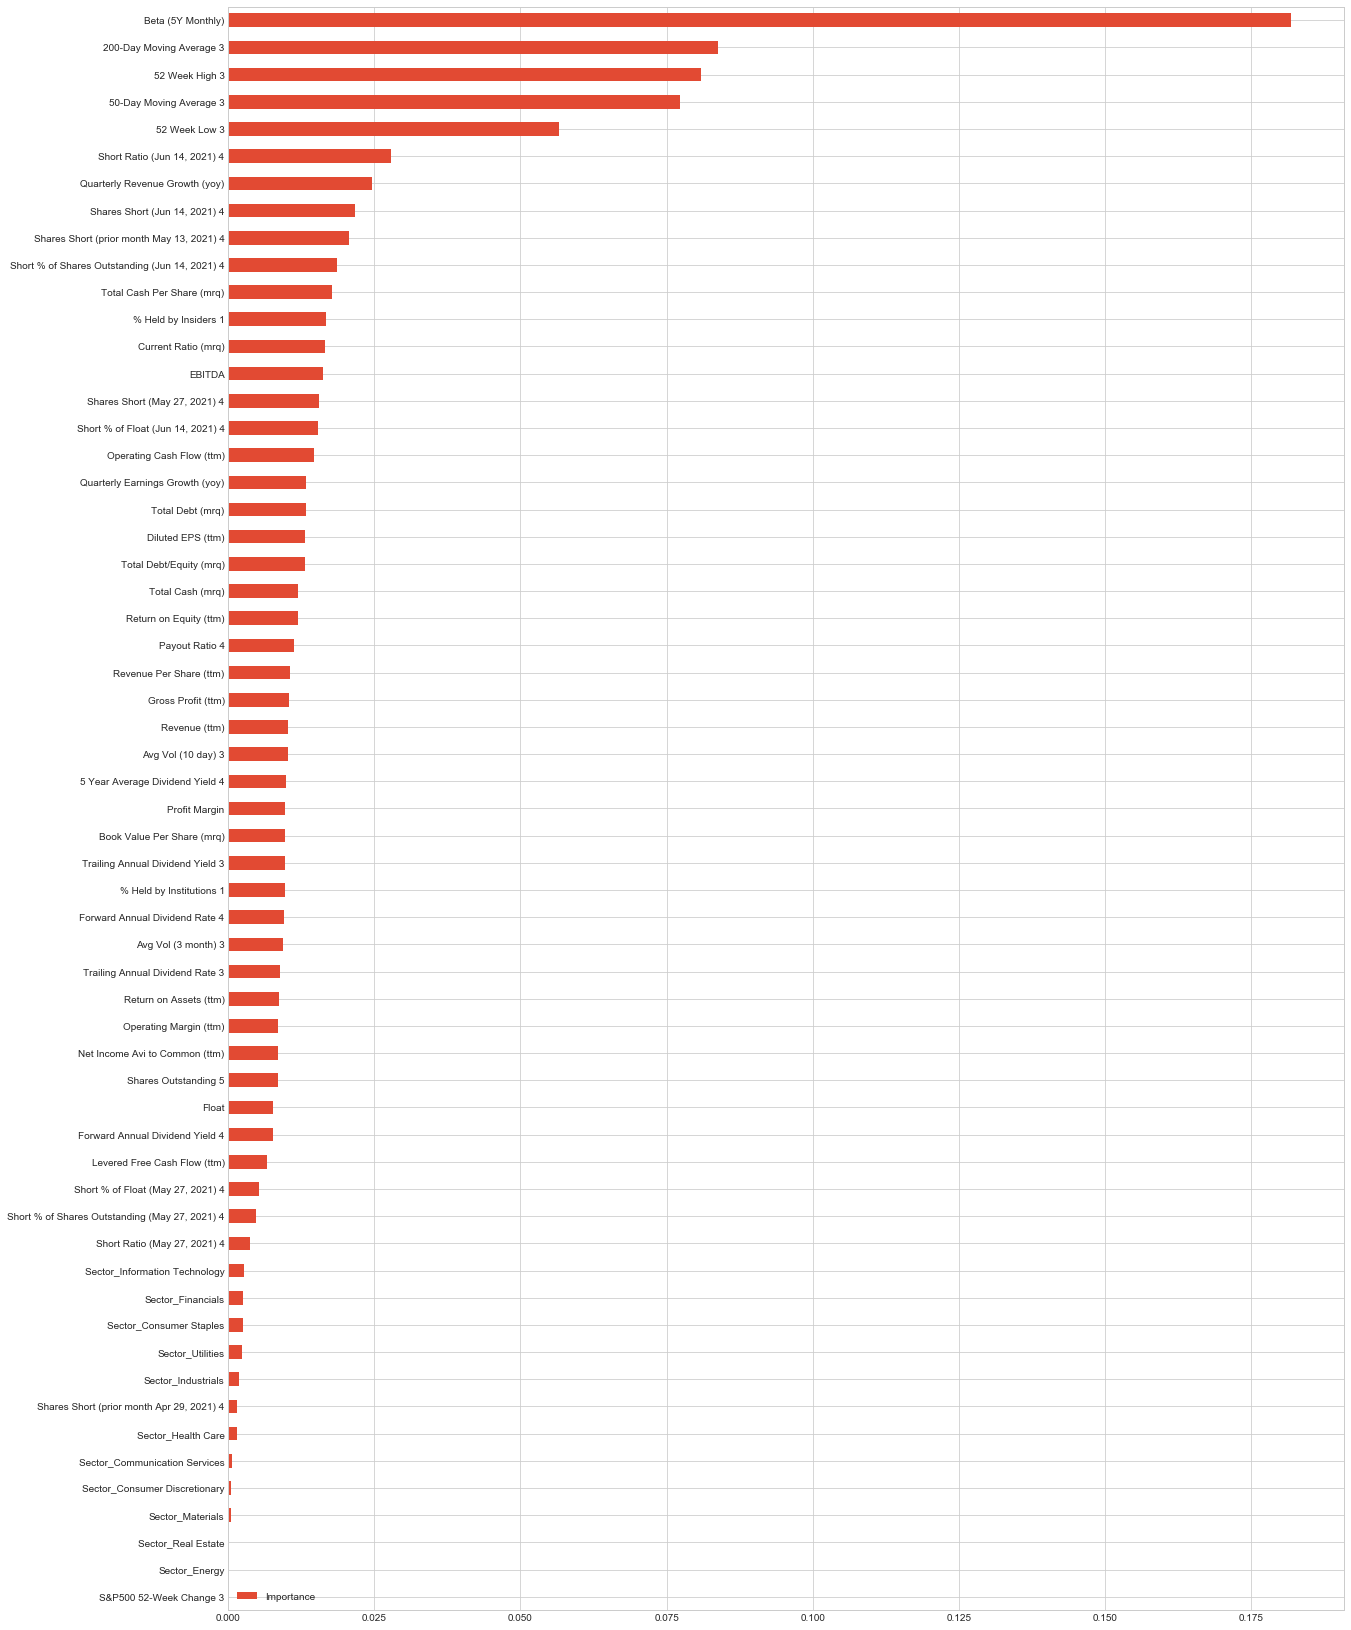

In [49]:
plt.style.use('seaborn-whitegrid')
Importances.plot(kind='barh', figsize=(20,len(importance)/2));

PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

In [59]:
std_X = preprocessing.StandardScaler().fit(X).transform(X)

In [60]:
fit1 = PCA(n_components=len(X.columns)).fit(std_X)

<BarContainer object of 59 artists>

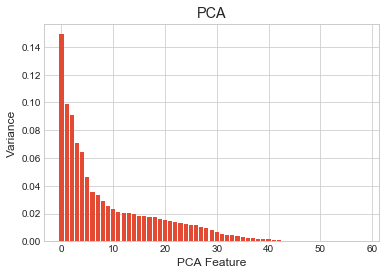

In [61]:
plt.style.use('seaborn-whitegrid')
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA')
plt.bar(range(0,fit1.explained_variance_ratio_.size),fit1.explained_variance_ratio_)

In [64]:
pd.DataFrame(fit1.explained_variance_ratio_, index=X.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
Beta (5Y Monthly),0.15
S&P500 52-Week Change 3,0.10
52 Week High 3,0.09
52 Week Low 3,0.07
50-Day Moving Average 3,0.06
200-Day Moving Average 3,0.05
Avg Vol (3 month) 3,0.04
Avg Vol (10 day) 3,0.03
Shares Outstanding 5,0.03
Float,0.03


Recursive Feature Elimination

In [65]:
Selector = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)

In [66]:
Selector.fit(X.values,y.values)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring=None, step=1, verbose=0)

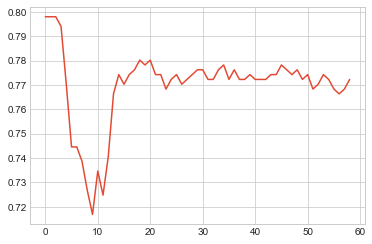

In [67]:
plt.plot(Selector.grid_scores_)

In [69]:
#ranking_ :The feature ranking, such that `ranking_[i]/corresponds to the ranking/position of the i-th feature./Selected (i.e., estimated best)/features are assigned rank 1.
pd.DataFrame(Selector.ranking_, index = X.columns, columns = ['Importance']).sort_values(by='Importance',ascending=False)

,Importance
"Short % of Float (Jun 14, 2021) 4",59
Sector_Energy,58
"Short % of Shares Outstanding (Jun 14, 2021) 4",57
Trailing Annual Dividend Yield 3,56
Forward Annual Dividend Yield 4,55
"Short % of Shares Outstanding (May 27, 2021) 4",54
"Short % of Float (May 27, 2021) 4",53
Sector_Communication Services,52
Sector_Materials,51
% Held by Insiders 1,50


# Split Train Test dataset 

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42)

# Algorithms

In [ ]:
From here, we will be running the following algorithms.

KNN
Logistic Regression
Random Forest
Naive Bayes
Stochastic Gradient Decent
Linear SVC
Decision Tree
Gradient Boosted Trees

In [72]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [73]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

#logistic regression

In [74]:
#logistic regression
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)

In [78]:
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 73.03
Accuracy CV 10-Fold: 75.92


In [79]:
print(metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       284
         1.0       0.21      0.09      0.12        69

    accuracy                           0.76       353
   macro avg       0.51      0.50      0.49       353
weighted avg       0.69      0.76      0.72       353



In [80]:
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84       119
         1.0       0.17      0.06      0.09        33

    accuracy                           0.73       152
   macro avg       0.47      0.49      0.47       152
weighted avg       0.65      0.73      0.68       152



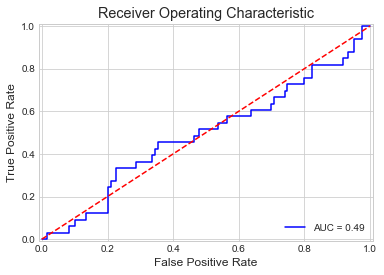

In [81]:
plot_roc_curve(y_test, probs_log)

K-nearest Neighbours

In [82]:
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)

In [83]:
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 69.74
Accuracy CV 10-Fold: 76.2


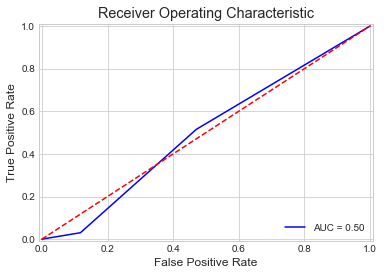

In [84]:

plot_roc_curve(y_test, probs_knn)

Gaussian Naive Bayes

In [85]:
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)

In [86]:
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 75.0
Accuracy CV 10-Fold: 78.19


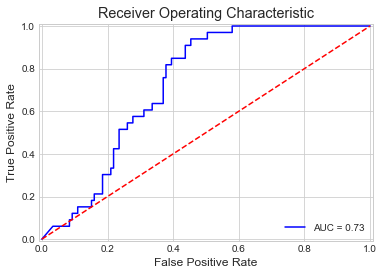

In [87]:
plot_roc_curve(y_test, probs_gau)

SVC

In [88]:
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)

In [89]:
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 73.68
Accuracy CV 10-Fold: 67.42


Stochastic Gradient Descent

In [128]:
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)

In [129]:
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 75.5
Accuracy CV 10-Fold: 58.0


Decision Tree Classifier


In [130]:
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

In [131]:
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 68.87
Accuracy CV 10-Fold: 70.86


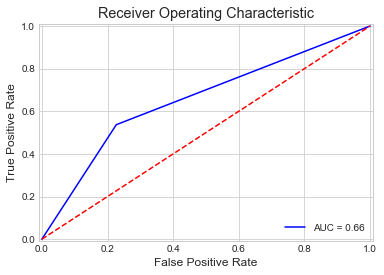

In [132]:
plot_roc_curve(y_test, probs_dt)

RandomForestClassifier

In [75]:
train_pred_rfc, test_pred_rfc, acc_rfc, acc_cv_rfc, probs_rfc = fit_ml_algo(RandomForestClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

In [76]:
print("Accuracy: %s" % acc_rfc)
print("Accuracy CV 10-Fold: %s" % acc_cv_rfc)

Accuracy: 88.82
Accuracy CV 10-Fold: 89.24


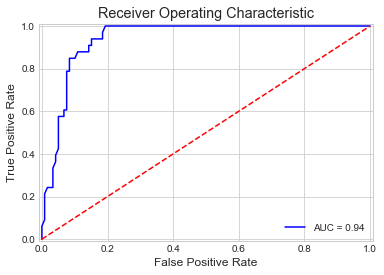

In [77]:
plot_roc_curve(y_test, probs_rfc)

GradientBoostingClassifier

In [90]:
train_pred_gbc, test_pred_gbc, acc_gbc, acc_cv_gbc, probs_gbc = fit_ml_algo(GradientBoostingClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

In [91]:
print("Accuracy: %s" % acc_gbc)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc)

Accuracy: 88.16
Accuracy CV 10-Fold: 90.93


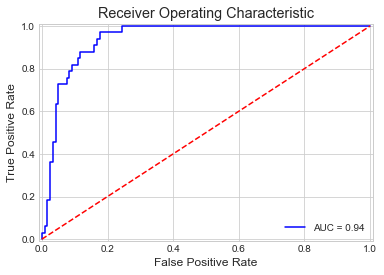

In [92]:
plot_roc_curve(y_test, probs_gbc)

In [53]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

In [52]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Created wheel for h2o: filename=h2o-3.32.1.5-py2.py3-none-any.whl size=164886113 sha256=39a111b63289bda61a90fa372b89e9381d14c7f9ca70aa3f0b5117576c32da24
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\2f\f4\f6\7115a720596f0b6c377b3d82c28242585c7bb7ab27d430f97c
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.


In [54]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator